### K近邻算法实现与应用

In [ ]:
# KNN 分类流程
import numpy as np

# 构造一批数据
def create_data():
    features = np.array(
        [
            [2.88, 3.05],
            [3.1, 2.45],
            [3.05, 2.8],
            [2.9, 2.7],
            [2.75, 3.4],
            [3.23, 2.9],
            [3.2, 3.75],
            [3.5, 2.9],
            [3.65, 3.6],
            [3.35, 3.3],
        ]
    )
    labels = ["A", "A", "A", "A", "A", "B", "B", "B", "B", "B"]
    return features, labels
    
features, labels = create_data()
print("features: \n", features)
print("labels: \n", labels)

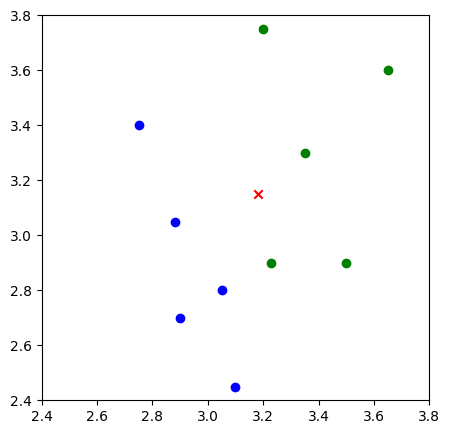

In [3]:
# 数据可视化
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(5, 5))
plt.xlim((2.4, 3.8))
plt.ylim((2.4, 3.8))

x_feature = list(map(lambda x: x[0], features))  # 返回每个数据的x特征值
y_feature = list(map(lambda y: y[1], features))

plt.scatter(x_feature[:5], y_feature[:5], c="b")  # 在画布上绘画出"A"类标签的数据点
plt.scatter(x_feature[5:], y_feature[5:], c="g")
plt.scatter([3.18], [3.15], c="r", marker="x")  # 待测试点的坐标为 [3.1，3.2]

In [9]:
# 度量两个样本间的相似度，最常用的两个公式
# 欧氏距离、曼哈顿距离
def d_man(x, y):
    d = np.sum(np.abs(x - y))
    return d

def d_euc(x, y):
    d = np.sqrt(np.sum(np.square(x - y)))
    return d

In [6]:
# 在进行决策时，有两种规则
# 多数表决法：在K个邻居中选择类别最多的种类作为测试样本的类别
# 加权表决法：根据距离的远近，对近邻的投票进行加权，距离越近则权重越大

# 推荐多数表决法，更简单
import operator


def majority_voting(class_count):
    # 多数表决函数
    sorted_class_count = sorted(
        class_count.items(), key=operator.itemgetter(1), reverse=True
    )
    return sorted_class_count


arr = {"A": 3, "B": 2, "C": 6, "D": 5}
majority_voting(arr)

[('C', 6), ('D', 5), ('A', 3), ('B', 2)]

在学习完以上的各个步骤之后，KNN 算法也逐渐被勾勒出来。以下就是对 KNN 算法的完整实现，本次实验的距离计算采用欧式距离，分类的决策规则为多数表决法，定义函数 `knn_classify()`，其中函数的参数包括：
* test_data: 用于分类的输入向量
* train_data: 输入的训练样本集
* labels: 样本数据的类标签向量
* k: 用于选择最近邻居的数目

In [7]:
def knn_classify(test_data, train_data, labels, k):
    # KNN 方法完整实现
    distances = np.array([])  # 创建一个空的数组用于存放距离

    for each_data in train_data:  # 使用欧式距离计算数据相似度
        d = d_euc(test_data, each_data)
        distances = np.append(distances, d)

    sorted_distance_index = distances.argsort()  # 获取按距离从小到大排序后的索引
    sorted_distance = np.sort(distances)
    r = (sorted_distance[k] + sorted_distance[k - 1]) / 2  # 计算

    class_count = {}
    for i in range(k):  # 多数表决
        vote_label = labels[sorted_distance_index[i]]
        class_count[vote_label] = class_count.get(vote_label, 0) + 1

    final_label = majority_voting(class_count)
    return final_label, r

In [12]:
test_data = np.array([3.18, 3.15])
final_label, r = knn_classify(test_data, features, labels, 5)
final_label

[('B', 3), ('A', 2)]

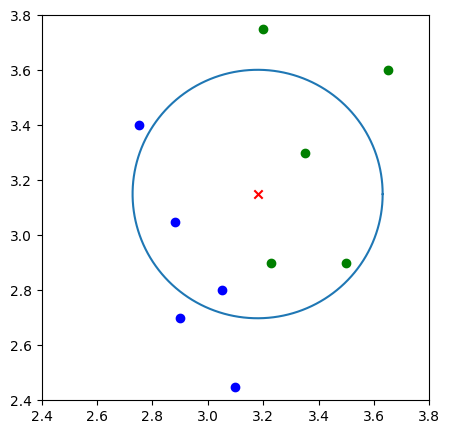

In [13]:
# 可视化
def circle(r, a, b):  # 为了画出圆，这里采用极坐标的方式对圆进行表示 ：x=r*cosθ，y=r*sinθ。
    theta = np.arange(0, 2 * np.pi, 0.01)
    x = a + r * np.cos(theta)
    y = b + r * np.sin(theta)
    return x, y

k_circle_x, k_circle_y = circle(r, 3.18, 3.15)

plt.figure(figsize=(5, 5))
plt.xlim((2.4, 3.8))
plt.ylim((2.4, 3.8))

x_feature = list(map(lambda x: x[0], features))  # 返回每个数据的 x 特征值
y_feature = list(map(lambda y: y[1], features))

plt.scatter(x_feature[:5], y_feature[:5], c="b")  # 在画布上绘画出"A"类标签的数据点
plt.scatter(x_feature[5:], y_feature[5:], c="g")
plt.scatter([3.18], [3.15], c="r", marker="x")  # 待测试点的坐标为 [3.1，3.2]
plt.plot(k_circle_x, k_circle_y)